# Python Implementation

## Business Case : To Find Out From Given Features Whether The Loan Will Get Approved Or Not

In [1]:
## supervised learning with classification task(2 classes)

In [201]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
## loading dataset

data=pd.read_csv('loan_approved.csv')


In [203]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [204]:
# getting 1st few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Basic Checks

In [205]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [207]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [208]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Exploratory Data Analysis

In [ ]:
!pip install autoviz

In [ ]:
!pip install wordcloud

In [ ]:
from autoviz.Auto_Class import Autoviz_Class
%matplotlib inline

AV=Autoviz_Class()

# Data Preprocessing Inline

In [209]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
data.shape

(614, 13)

In [211]:
## getting the rows where values are missed in gender feature
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [212]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [213]:
# how much values have been missed
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

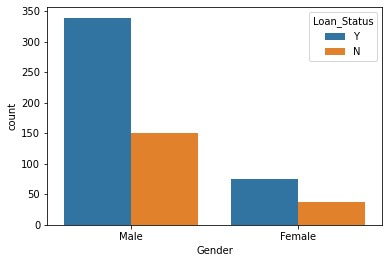

In [214]:
sns.countplot(data['Gender'],hue=data['Loan_Status'])

In [215]:
# imputing the missing values with mode.
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [216]:
data.Gender.isnull().sum()

0

In [217]:
# getting the null values in dependents
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [218]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

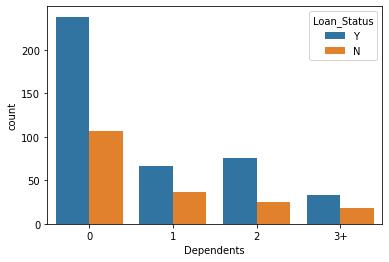

In [219]:
sns.countplot(data['Dependents'],hue=data['Loan_Status'])

In [220]:
# from the graphical representation we can say that as the number of dependents increase the chance of getting loan approved is less.
# so we can replace missing values with 3+ because if we approve a loan for missing values it may lead to a problem.

data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [221]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

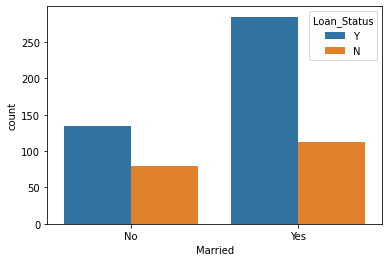

In [222]:
sns.countplot(data['Married'],hue=data['Loan_Status'])

In [223]:
# getting the counts
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [224]:
data['Married'].isnull().sum()

3

In [225]:
# imputing missing values with mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

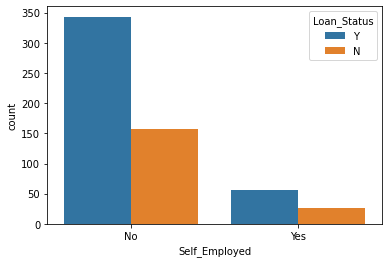

In [226]:
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])

In [227]:
data['Self_Employed'].isnull().sum()

32

In [228]:
# replacing Nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [229]:
data['Self_Employed'].isnull().sum()

0

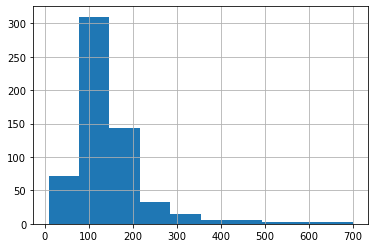

In [230]:
# Histogram since it has numerical value
data['LoanAmount'].hist()
plt.show()

In [231]:
np.median(data['LoanAmount'].dropna(axis=0))

128.0

#### since data is skewed replace nan values with median and it is recommended to use mean only for symmetric distribution

In [232]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data['LoanAmount'].dropna(axis=0))

In [233]:
# Loan_Amount_Term

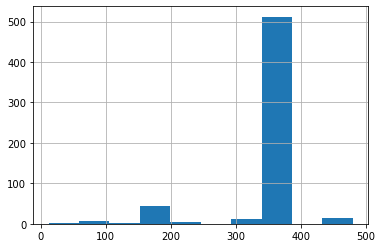

In [234]:
# Histogram since it has numerical value
data['Loan_Amount_Term'].hist()
plt.show()

In [235]:
# replace nan values with median

data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data['Loan_Amount_Term'].dropna(axis=0))

In [236]:
# Credit_History

In [237]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

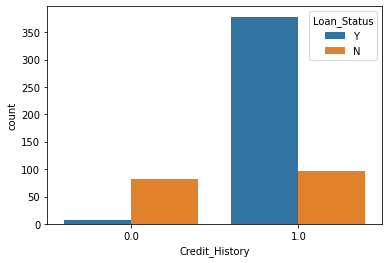

In [238]:
sns.countplot(data['Credit_History'],hue=data['Loan_Status'])

In [239]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [240]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [241]:
# step 2 handling the categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [115]:
## using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.Gender=lc.fit_transform(data.Gender)
data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Self_Employed=lc.fit_transform(data.Self_Employed)
data.Dependents =lc.fit_transform(data.Dependents )
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_Status=lc.fit_transform(data.Loan_Status)

In [116]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [117]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [118]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,0.743590,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.743590,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,0,1
610,LP002979,1,1,3,0,0,0.048930,0.000000,0.044863,0.358974,1.0,0,1
611,LP002983,1,1,1,0,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,LP002984,1,1,2,0,0,0.091936,0.000000,0.257598,0.743590,1.0,2,1


In [120]:
data.duplicated().sum()

0

# Feature Selection

In [123]:
# removing reductant columns
# We can drop loan id.

In [128]:
# checking for correlation only for continuos data
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<AxesSubplot:>

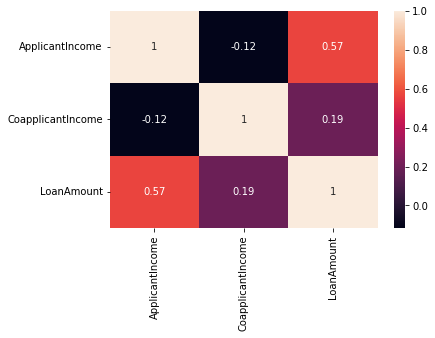

In [129]:
sns.heatmap(corr_data.corr(),annot=True)

In [130]:
## there is no relationship among numerical data

In [132]:
corr_data.describe()  # no constant features

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905
std,0.075560,0.070229,0.121718
min,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055
50%,0.045300,0.028524,0.172214
75%,0.069821,0.055134,0.225398
max,1.000000,1.000000,1.000000


# Model Creation

In [133]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [134]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.070489,0.000000,0.172214,0.743590,1.0,2
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.743590,1.0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,2
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,2
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,0
610,1,1,3,0,0,0.048930,0.000000,0.044863,0.358974,1.0,0
611,1,1,1,0,0,0.097984,0.005760,0.353111,0.743590,1.0,2
612,1,1,2,0,0,0.091936,0.000000,0.257598,0.743590,1.0,2


In [135]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [136]:
# creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [140]:
x_test.value_counts().sum()

154

In [137]:
# balancing the data
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [142]:
# install imblearn package !pip install imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [143]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

#### Counter is a variable which keep track on how many times equivalent values are added

In [145]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({1: 301, 0: 159})
Counter({1: 301, 0: 301})


In [148]:
# support vector classifier
from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_smote,y_smote)

SVC()

In [150]:
# predict output for x_test
y_pred=svclassifier.predict(x_test)

In [159]:
# evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, f1_score

In [152]:
accuracy_score(y_test,y_pred)

0.7597402597402597

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.61      0.52        33
           1       0.88      0.80      0.84       121

    accuracy                           0.76       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.79      0.76      0.77       154



In [154]:
y_train_pred=svclassifier.predict(x_train)

In [155]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       159
           1       0.81      0.83      0.82       301

    accuracy                           0.76       460
   macro avg       0.74      0.73      0.74       460
weighted avg       0.76      0.76      0.76       460



In [156]:
cm1=pd.crosstab(y_test,y_pred)

In [157]:
cm1

col_0,0,1
Loan_Status,,
0,20,13
1,24,97


In [160]:
f1_score(y_test,y_pred)

0.8398268398268398

In [162]:
# checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)

[0.85049834 0.82236842 0.85616438]


In [163]:
print('cross_validation_score:',scores.mean())

cross_validation_score: 0.8430103811615691


# GridSearchCV

In [188]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,20))}
model=SVC()
grid=GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [189]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 5, 'gamma': 0.1, 'random_state': 1}


In [190]:
print(grid.best_estimator_)

SVC(C=5, gamma=0.1, random_state=1)


In [191]:
clf=SVC(C=1,gamma=0.1,random_state=1)

In [192]:
clf.fit(x_smote,y_smote)

SVC(C=1, gamma=0.1, random_state=1)

In [193]:
y_clf=clf.predict(x_test)

In [194]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.85      0.88      0.87       121

    accuracy                           0.79       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.78      0.79      0.78       154



In [195]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_Status,,
0,15,18
1,15,106


In [199]:
f1=f1_score(y_test,y_clf)
f1

0.8653061224489798

In [200]:
# checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores)

[0.85049834 0.82236842 0.85616438]


# if you can see f1 score is improved however recall is almost same.

In [242]:
# using one hot encoding

In [243]:
df1=pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [244]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [245]:
df2=pd.get_dummies(data['Married'],prefix='Married',drop_first=True)
data=pd.concat([data,df2],axis=1).drop(['Married'],axis=1)

In [246]:
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1


In [247]:
df3=pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True)
data=pd.concat([data,df3],axis=1).drop(['Dependents'],axis=1)

In [248]:
data

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,0,0
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,0,0
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,0
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,0
610,LP002979,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,1
611,LP002983,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0
612,LP002984,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,1,0


In [249]:
df4=pd.get_dummies(data['Education'],prefix='Education',drop_first=True)
data=pd.concat([data,df4],axis=1).drop(['Education'],axis=1)

In [250]:
data

,Loan_ID,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate
0,LP001002,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,0,0,0
1,LP001003,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,0
2,LP001005,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,0,0,0
3,LP001006,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,0,1
4,LP001008,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,0,0
610,LP002979,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,1,0
611,LP002983,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,0
612,LP002984,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,1,0,0


In [251]:
df5=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True)
data=pd.concat([data,df5],axis=1).drop(['Self_Employed'],axis=1)

In [252]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes
0,LP001002,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,0,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,0,1,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,1,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,0
612,LP002984,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,1,0,0,0


In [253]:
df6=pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data=pd.concat([data,df6],axis=1).drop(['Property_Area'],axis=1)

In [254]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,1,0,0,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,1,1,0,1,0,0,0,0,1


In [255]:
df7=pd.get_dummies(data['Loan_Status'],prefix='Loan_Status',drop_first=True)
data=pd.concat([data,df7],axis=1).drop(['Loan_Status'],axis=1)

In [256]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [259]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [260]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=sc.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [261]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0.072991,-0.554487,-0.211241,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,-0.134412,-0.038732,-0.211241,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,-0.393747,-0.554487,-0.948996,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,-0.462062,0.251980,-0.306435,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,0.097728,-0.554487,-0.056551,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-0.410130,-0.554487,-0.889500,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,LP002979,-0.212557,-0.554487,-1.258378,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,LP002983,0.437174,-0.472404,1.276168,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,LP002984,0.357064,-0.554487,0.490816,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [262]:
x=data.iloc[:,1:-1]

In [263]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,360.0,1.0,1,0,0,0,0,0,0,0,1
1,-0.134412,-0.038732,-0.211241,360.0,1.0,1,1,1,0,0,0,0,0,0
2,-0.393747,-0.554487,-0.948996,360.0,1.0,1,1,0,0,0,0,1,0,1
3,-0.462062,0.251980,-0.306435,360.0,1.0,1,1,0,0,0,1,0,0,1
4,0.097728,-0.554487,-0.056551,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,360.0,1.0,0,0,0,0,0,0,0,0,0
610,-0.212557,-0.554487,-1.258378,180.0,1.0,1,1,0,0,1,0,0,0,0
611,0.437174,-0.472404,1.276168,360.0,1.0,1,1,1,0,0,0,0,0,1
612,0.357064,-0.554487,0.490816,360.0,1.0,1,1,0,1,0,0,0,0,1


In [264]:
y=data.iloc[:,-1]

In [265]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [266]:
# checking for correlation only for continuos data
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<AxesSubplot:>

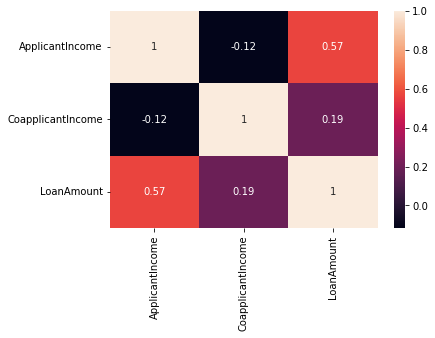

In [267]:
sns.heatmap(corr_data.corr(),annot=True)

In [268]:
# creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [269]:
x_train.value_counts().sum()

460

In [273]:
# install imblearn package !pip install imblearn
from imblearn.over_sampling import SMOTE
smote1=SMOTE()

In [274]:
x_smote,y_smote=smote1.fit_resample(x_train,y_train)

In [275]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({1: 301, 0: 159})
Counter({1: 301, 0: 301})


In [276]:
# support vector classifier
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_smote,y_smote)

SVC()

In [277]:
y_pred2=model2.predict(x_test)

In [278]:
accuracy_score(y_test,y_pred2)

0.7857142857142857

In [279]:
pd.crosstab(y_test,y_pred2)

col_0,0,1
Loan_Status_Y,,
0,2,31
1,2,119


In [280]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        33
           1       0.79      0.98      0.88       121

    accuracy                           0.79       154
   macro avg       0.65      0.52      0.49       154
weighted avg       0.73      0.79      0.71       154

